# Load Data

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, pickle, argparse
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spatial
from scipy import stats, integrate
from tabulate import tabulate
from scipy import stats, integrate
csv.field_size_limit(sys.maxsize)

from functions.load_rawdata import *
from functions.process_spatdata import *
from functions.model_spatdata import *

TOLENGTH = 0.227 # pixel to length (um)


path_data = 'spatdata/day_117.pkl'
    
if not os.path.isfile(path_data):
    assert False, 'The spatdat has not generated!'
with open(path_data, 'rb') as input:
    spatdata = pickle.load(input)

# Plot Marker Genes' Expression

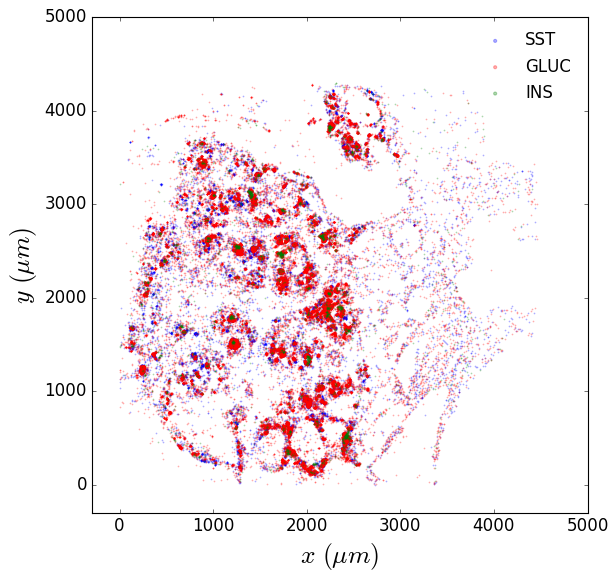

In [7]:
def plot_expression(dat, genes_plot):
    def plot_individual(data, index, name_gene, numbers_gene):
        colors = ['b', 'r', 'g']
        l = [[] for i in range(len(numbers_gene))]
        font_size = 15   
        fig = plt.figure(figsize=(8, 8))
        ax = plt.gca() 
        for i, number_gene in enumerate(numbers_gene):
            ind = index[number_gene]
            l[i] = plt.scatter(TOLENGTH*np.array(data[2][ind], dtype=np.float), 
                               TOLENGTH*np.array(data[3][ind], dtype=np.float),
                               s = 0.3, edgecolors = 'face', c=colors[i], alpha = 0.3)
        bbox_to_anchor = (0.75, 0.9)
        plt.xlim(-300, 5000)
        plt.ylim(-300, 5000)            
        leg = plt.legend(l, np.array(name_gene)[numbers_gene], loc='center left', 
                         bbox_to_anchor=bbox_to_anchor, fontsize=font_size, 
                         markerscale=5, scatterpoints = 1)
        leg.get_frame().set_linewidth(0.0)
        plt.xticks(fontsize=font_size)
        plt.yticks(fontsize=font_size)
        plt.xlabel(r'$x \ (\mu m)$', fontsize=font_size+8)
        plt.ylabel(r'$y \ (\mu m)$', fontsize=font_size+8)                
    ind_plot = get_ind_names(dat, genes_plot)
    plot_individual(dat.data, dat.index, dat.name_gene, ind_plot)
    
plot_expression(spatdata, genes_plot)

# Plot Nuclei Position

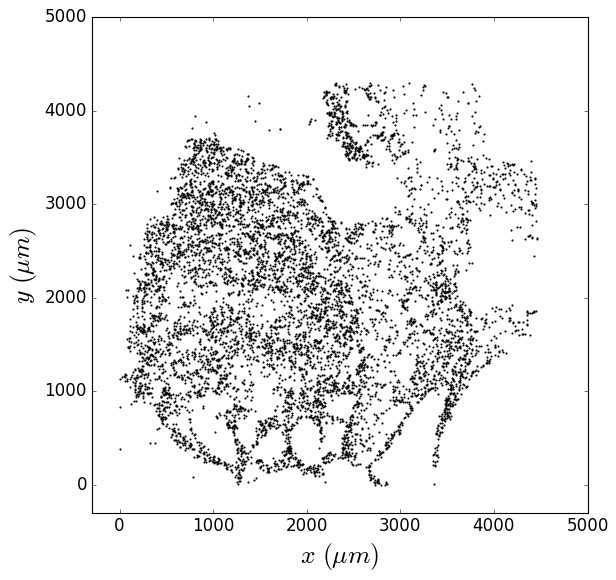

In [8]:
def plot_nuc(dat):
    def plot_nuc_individual(data):
        font_size = 15   
        num_plot = 8000
        fig = plt.figure(figsize=(8, 8))
        ax = plt.gca()
        #ax.set_aspect(1) 
        ind = np.random.choice(range(data.shape[1]), num_plot, replace=False)
        plt.scatter(TOLENGTH*np.array(data[2][ind], dtype=np.float), 
                    TOLENGTH*np.array(data[3][ind], dtype=np.float), 
                    s = 0.8, edgecolors = 'face', c = 'k', alpha = 1)
        plt.xticks(fontsize=font_size)
        plt.yticks(fontsize=font_size)  
        plt.xlabel(r'$x \ (\mu m)$', fontsize=font_size+8)
        plt.ylabel(r'$y \ (\mu m)$', fontsize=font_size+8)
        bbox_to_anchor = (0.75, 0.9)
        plt.xlim(-300, 5000)
        plt.ylim(-300, 5000)            
    plot_nuc_individual(dat.data_nuc)

plot_nuc(spatdata)

# Plot Indentified Endocrine Islets

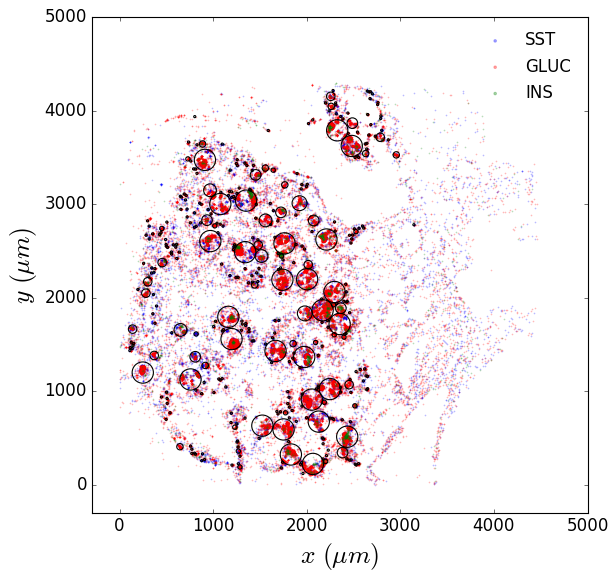

In [10]:
def plot_islets(dat, genes_plot):
    def plot_individual(data, index, name_gene, numbers_gene, circles):
        colors = ['b', 'r', 'g', 'c', 'm', 'mediumpurple', 'y', 'k',  'olive', 'orange']
        alphas = [0.3, 0.3, 0.3, 0., 0., 0.]
        l = [[] for i in range(len(numbers_gene))]
        font_size = 15  
        fig = plt.figure(figsize=(8, 8))
        ax = plt.gca()
        #ax.set_aspect(1)    
        for i, number_gene in enumerate(numbers_gene):
            ind = index[number_gene]
            l[i] = plt.scatter(TOLENGTH*np.array(data[2][ind], dtype=np.float), 
                               TOLENGTH*np.array(data[3][ind], dtype=np.float), 
                               s = 0.2, edgecolors = 'face', c=colors[i], alpha = alphas[i])
        bbox_to_anchor = (0.75, 0.9)
        plt.xlim(-300, 5000)
        plt.ylim(-300, 5000)            
        leg = plt.legend(l, np.array(name_gene)[numbers_gene], loc='center left', bbox_to_anchor=bbox_to_anchor, fontsize=font_size, 
                         markerscale=5, scatterpoints = 1)
        leg.get_frame().set_linewidth(0.0)
        plt.xticks(fontsize=font_size)
        plt.yticks(fontsize=font_size)    
        plt.xlabel(r'$x \ (\mu m)$', fontsize=font_size+8)
        plt.ylabel(r'$y \ (\mu m)$', fontsize=font_size+8)
        sign_circle = True
        if sign_circle:
            for circle in circles:
                circle_i = plt.Circle((TOLENGTH*circle[0], TOLENGTH*circle[1]), TOLENGTH*circle[2], 
                                      linewidth=1., fill=False)
                ax.add_artist(circle_i)
    ind_plot = get_ind_names(dat, genes_plot)
    plot_individual(dat.data, dat.index, dat.name_gene, numbers_gene=ind_plot, circles=dat.circles)

plot_islets(spatdata, genes_plot)

# Distribution of Islets Size

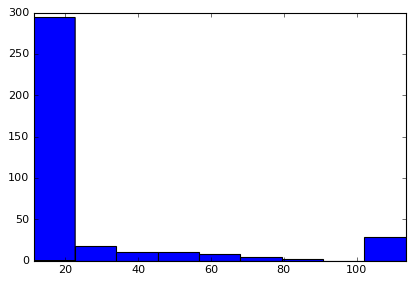

In [9]:
def plot_hist_islets(dat):    
    fig = plt.figure()
    plt.hist(TOLENGTH*dat.circles[:, 2], TOLENGTH*np.arange(50, 550, 50))
    plt.xlim(50*TOLENGTH, 500*TOLENGTH)
plot_hist_islets(spatdata)

# Density Profile in respect to Endocrine Islets

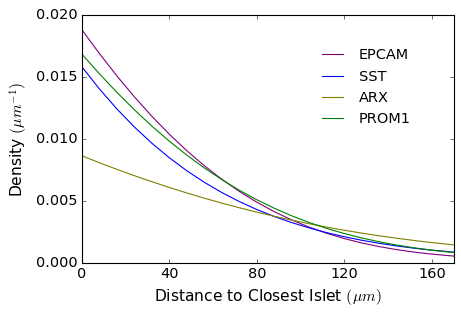

In [11]:
def plot_profile(dat, ind_plot):
    for inds in [ind_plot]:
        colors = ['purple', 'b', 'olive', 'g']
        fig = plt.figure()
        font_size = 13
        plt.xlim(0, 170)
        for count, i in enumerate(inds):
            plt.plot(TOLENGTH*dat.support, dat.densities[i]/TOLENGTH, c=colors[count])
        plt.xlabel(r'Distance to Closest Islet $(\mu m)$', fontsize=font_size+1)
        plt.ylabel(r'Density $(\mu m^{-1})$', fontsize=font_size+1)
        plt.xticks([0, 40, 80, 120, 160], fontsize=font_size)
        plt.yticks(fontsize=font_size) 
        leg = plt.legend(np.array(dat.name_gene)[inds], fontsize=font_size, loc=0, bbox_to_anchor=(0.6, 0.5))
        leg.get_frame().set_linewidth(0.0)
        
corr = spatdata.corr_den
names_plot = ['EPCAM', 'SST', 'ARX', 'PROM1']
ind_plot = [spatdata.name_gene.index(name) for name in names_plot]
plot_profile(spatdata, ind_plot)

# Difference between Density Profiles

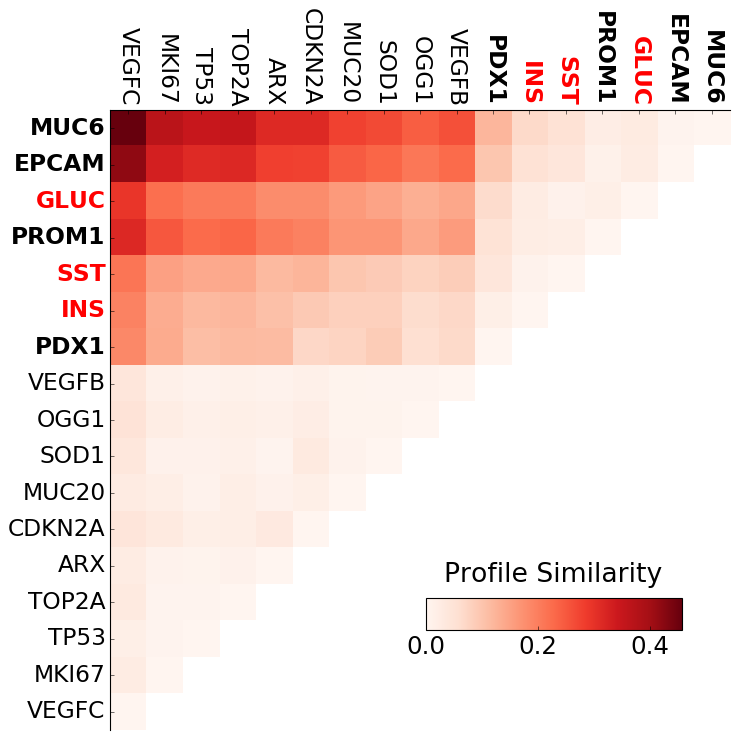

In [23]:
import scipy.cluster.hierarchy as sch
from matplotlib import cm as CM

def get_diff(dat, densities):
    n = len(dat.name_gene)
    entropy_den = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            entropy_den[i, j] = stats.entropy(densities[i], qk=densities[j]) 
    return entropy_den

def plot_D_designed(index_t, D, muc=False):
    n = len(index_t)
    ticklabel = [spatdata.name_gene[index_t[i]] + '  ' + str(i) for i in range(n)]
    ticklabel = [spatdata.name_gene[index_t[i]] for i in range(n)]   

    fig = plt.figure(figsize=(10, 10))    
    cmap = CM.get_cmap('jet', 10) # jet doesn't have white color
    cmap.set_bad('w')
    im = plt.imshow(D, interpolation="nearest", origin="upper", cmap="Reds")
    ax = plt.gca() 
    ax.set_xticks(range(n))
    ax.set_xticklabels(ticklabel, rotation=270, fontsize=21)
    ax.set_yticklabels(ticklabel, fontsize=21)
    ax.set_yticks(range(n))
    ax.xaxis.tick_top()
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_yaxis().tick_left()
    ax.get_xaxis().tick_top()
    ax.invert_yaxis()   
    xt = ax.xaxis.get_ticklabels()
    yt = ax.yaxis.get_ticklabels()
    for i in range(len(xt)):
        if i >= 10:
            xt[i].set_weight('bold')
            yt[i].set_weight('bold')
        if ticklabel[i] in ['INS', 'GLUC', 'SST']:
            xt[i].set_color('r')
            yt[i].set_color('r') 
    
    position = fig.add_axes([0.52, 0.25, 0.32, 0.04])
    plt.text(0.07, 1.5, 'Profile Similarity', fontsize=24)
    tick = [0, 0.2, 0.4, 0.6]
    cbar = plt.colorbar(ticks=tick, cax=position, orientation="horizontal")
    for font_objects in cbar.ax.xaxis.get_ticklabels():
        font_objects.set_size(22)
    

D = get_diff(spatdata, spatdata.densities)

picked_genes_names = ['VEGFC', 'MKI67', 'TP53', 'TOP2A', 'ARX', 'CDKN2A',
                  'MUC20', 'SOD1', 'OGG1', 'VEGFB', 'PDX1', 'INS', 
                  'SST', 'PROM1', 'GLUC', 'EPCAM', 'MUC6']   
ind_reorder = [spatdata.name_gene.index(name) for name in picked_genes_names]
D = D[ind_reorder, :]
D = D[:, ind_reorder]    
mask = np.tri(D.shape[0], k=-1).T  
D = 0.5 * (np.ma.array(D, mask=mask) + np.ma.array(D.T, mask=mask))
plot_D_designed(ind_reorder, D, muc=False)

# Example of Relation to Nuclei
## Density Profile in respect to Nuclei

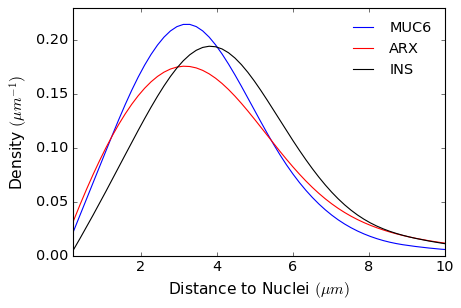

In [12]:
def plot_profile(dat, ind_plot):
    for inds in [ind_plot]: #, range(6), range(6, 12), range(12, 18), range(18, 25)]:
        fig = plt.figure()
        font_size = 13
        colors = ['b', 'r', 'k', 'purple', 'o']
        plt.xlim(0.2, 10)
        plt.ylim(0, 0.23)
        for count, i in enumerate(inds):
            plt.plot(TOLENGTH*dat.support_nuc, dat.densities_nuc[i]/TOLENGTH, c=colors[count])
        plt.xlabel(r'Distance to Nuclei $(\mu m)$', fontsize=font_size+1)
        plt.ylabel(r'Density $(\mu m ^{-1})$', fontsize=font_size+1)
        plt.xticks(fontsize=font_size)
        plt.yticks(fontsize=font_size) 
        leg = plt.legend(np.array(dat.name_gene)[inds], fontsize=font_size)
        leg.get_frame().set_linewidth(0.0) 
        
corr = spatdata.corr_den_nuc
names_plot = ['MUC6', 'ARX', 'INS']
ind_plot = [spatdata.name_gene.index(name) for name in names_plot]
plot_profile(spatdata, ind_plot)